In [13]:
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = 'data/UpdatedResumeDataSet.csv'

In [5]:
df = pd.read_csv(dataset)

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
#lets take first resume as a sample
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [15]:
#lets clean the text
def clean_data(raw_data: str) -> str:
    """
    Function to clean URL, Hashtags, @Mentions, Special Chars from text
    """
    clean_text = re.sub('http\S+\s', ' ', raw_data)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+\s', ' ', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)  
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text) 
    clean_text = re.sub('\s+', ' ', clean_text)   
    return clean_text

In [16]:
clean_data(df['Resume'][0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit([df['Resume'][0]])

CountVectorizer()

In [23]:
words = vectorizer.vocabulary_

In [27]:
restructured_data = [ (k,v)  for k, v in words.items()]
word_counts = pd.DataFrame(restructured_data, columns=['Word','Count'])
word_counts -

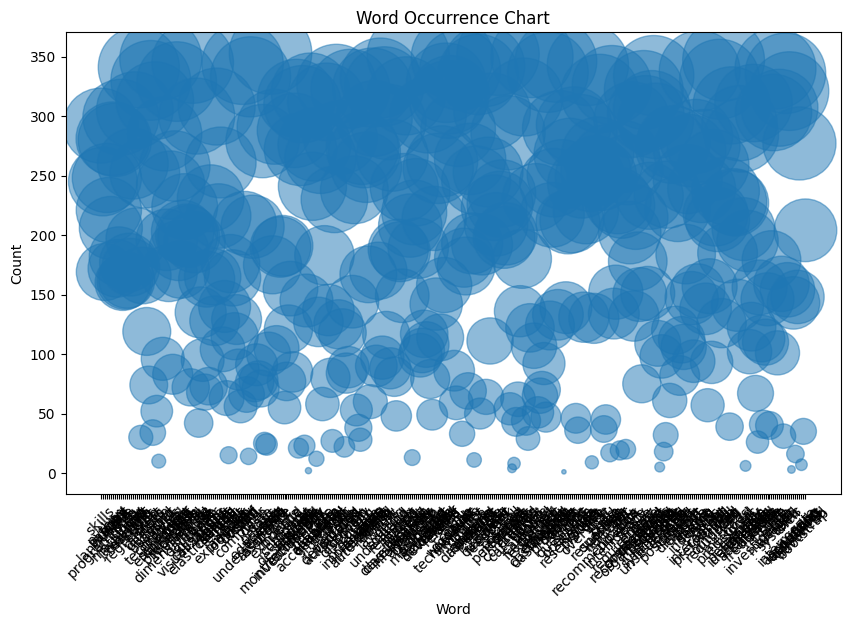

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(word_counts['Word'], word_counts['Count'], s=word_counts['Count']*10, alpha=0.5)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Occurrence Chart')
plt.xticks(rotation=45)
plt.show()